# <font color=black>Entrainer, régler et valider un algorithme de classification avec la bonne méthodologie </font>

Pour entrainer un modèle et l’évaluer avec la bonne méthodologie on va voir comment:
* Créer un `train_set` et un `test_set`avec la fonction `train_test_split()`
* Valider un modèle avec la technique de `cross validation` 
* Améliorer un modèle en utilisant `GridSerchCV` et `RandomizedSerchCV`   
* Valider un modèle avec `learning_curve`.

Pour ce Notebook, nous allons utiliser le célèbre jeu de données `IRIS`. Ce dataset décrit les espèces d’IRIS par quatre propriétés : `longueur` et `largeur` de `sépales` ainsi que `longueur` et `largeur` de `pétales`. IRIS comporte `150` observations (50 observations par espèce).

<img src="petal.PNG">

<img src="iris.PNG">

# <font color=blue>Entrainement et evaluation d'un modèle de classification</font>

Pour commencer on doit  charger les bibliothèques necessaires:
* `numpy` : (numerical python)
* `sklearn`: Sckit-learn
Sklearn vient avec un ensemble de bases de données prêtes à l’emploi pour des raisons académiques(apprendre le machine learning). 
Ces bases de données sont regroupées dans le package  sklearn.datasets.

In [57]:
    #Chargement des bibliothèques
import numpy as np
from sklearn.datasets import load_iris
IRIS=load_iris()
IRIS
IRIS.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [60]:
   # un tableau 2D qui contient les mesures de chaque fleur
X=IRIS.data
   # un tableau 1D qui contient l'éspèce de chaque fleur
Y=IRIS.target

In [61]:
# vérifier les types de X et y
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [62]:
# avoir une idée sur les dimensions de X et y
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [63]:
# afficher les noms des variables (“feature” en anglais) ainsi que les classes des fleurs
IRIS.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [64]:
IRIS.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Maintenant il est temps d’entrainer un modèle machine learning. Pour faire simple, nous allons commencer avec l'un des modèles de classification le plus simple, ici en occurence le KNN. 

In [65]:
# chargement du modèle KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Entrainer le modèle avec la méthode fit
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(X,Y)



KNeighborsClassifier(n_neighbors=1)

In [67]:
# Calculer le score du modèle avec la méthode score

KNN.score(X,Y)

1.0

### Un score de 100%. Qu'en pensez-vous?

En machine learning il ne faut jamais évaluer la performance de votre modèle sur les mêmes données qui vont servir à son entrainement. Donc quand on fait du machine learning on divise toujours notre dataset en deux parties un `train_set` et un `test_set`. En générale on met 80% des données dans le `train_set`et 20% pour le `test_set`. 

##  <font color=red>Train_test_split</font>

Pour diviser le dataset on importe  la fonction `tarin_test_split`, ensuite on crée des tableaux `X_train, X_test, y_train, et y_test` et on fait passer les données X et y dans la fonction `train_test_split()`  après, on peut choisir le pourcentage de données à mettre dans le `train_set` et dans le `test_set`. 

<img src="split.png">

In [70]:
# Charger la méthode train_test_split qui nous vient du module model_selection de la bibliothèque sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)

(120, 4)


Executer le code ci_dessous une autre fois et comparer les valeurs de X_train

Si vous n’obtenez pas les mêmes nuages c’est normal. Quand on utilise la fonction `train_test_split` le dataset est mélangé de façon aléatoire, avant d’être diviser en deux parties. Si vous désirez contrôler l’aléatoire fixez l’argument `rondom_state`  sur un nombre par exemple 5.

In [74]:
#n_neighbors=1
# la méthode fit pour entrainer un modèle
# la méthode score pour calculer le test_score ou le train_score
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,Y_train)
KNN.score(X_test,Y_test)
KNN.score(X_train,Y_train)

1.0

In [72]:
# n_neighbors=3
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,Y_train)
KNN.score(X_test,Y_test)

0.9333333333333333

In [77]:
# n_neighbors=5
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
KNN.score(X_test,Y_test)


0.9333333333333333

Vous avez presque tout compris parce qu’il reste une dernière chose à voir. En effet qu’est ce qui nous garantit que la façon dont on découpe le dataset est la bonne? Eh bien face à cette situation il existe une solution c’est la `cross_validation`.

## <font color=red>Cross Validation</font>

 La `cross_validation` consite à entrainer puis valider notre modèle sur plusieurs découpes possibles du `train_set`. Par exemple en découpant le `train_set` en 5 parties, on peut entrainer notre modèle sur les 4 premières parties puis le valider sur la cinquième partie. Ensuite, on va refaire tout ça pour toutes les configurations possibles … au final on fera la moyenne des 5 scores et ainsi lorsqu’on voudra comparer nos modèles alors on sera sûr de prendre celui qui a en moyenne eu les meilleures performances! 

<img src="cross_validation.png">

Pour faire tout ça dans Python on importe la fonction `cross_val_score`. Dans cette fonction il suffit de faire passer notre modèle nos données `X_train` et `y_train` ainsi que le nombre de split(découpes) que l’on veut dans notre `cross_validation` par exemple 5. 

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(n_neighbors=5),X_train,Y_train,cv=5).mean()

0.9833333333333334

In [81]:
KNeighborsClassifier?

Maintenant on va essayer d'améliorer le modèle et obtenir un score de 95%, 96% voir 99%. Il va falloir donc régler les hyperparamètres du modèle.

# <font color=blue>Réglage des Hyperparamètres</font>

Pour commencer on va essayer d'optimiser le nombre des voisins 'n_neighbors'

Pour aller vite on pourrait tester tout ça dans une boucle `for` en enregistrant chaque score que l’on obtient dans une liste `val_score`.

In [85]:
val_score=[]
K=np.arange(1,50)
for i in K:
    score=cross_val_score(KNeighborsClassifier(n_neighbors=i),X_train,Y_train,cv=5)
    val_score.append(score.mean())
val_score




[0.975,
 0.9666666666666668,
 0.975,
 0.9666666666666668,
 0.9833333333333334,
 0.9583333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9833333333333334,
 0.975,
 0.9833333333333334,
 0.975,
 0.9833333333333334,
 0.975,
 0.9666666666666666,
 0.975,
 0.975,
 0.95,
 0.9583333333333334,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9333333333333333,
 0.925,
 0.9333333333333333,
 0.925,
 0.9166666666666667,
 0.9333333333333333,
 0.9083333333333334,
 0.9166666666666666,
 0.9,
 0.8916666666666666,
 0.8916666666666668,
 0.9,
 0.9,
 0.8916666666666666,
 0.8833333333333334,
 0.8916666666666666,
 0.8916666666666666,
 0.8916666666666666,
 0.8916666666666668,
 0.875,
 0.875,
 0.8833333333333334,
 0.875,
 0.8916666666666666,
 0.8916666666666668]

In [86]:
print(len(val_score))


49


Ensuite en affichant ces résultats avec `Matplotlib`, on obtient le graphique ci-dessous (voir graphique) donc on peut voir qu’on obtiendra les meilleurs performances quand on aura des nombres de voisins qui sont aux alentours de 5.

ValueError: x and y must have same first dimension, but have shapes (50,) and (49,)

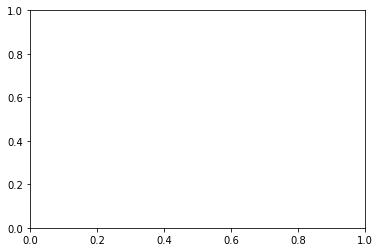

In [91]:
import matplotlib.pyplot as plt
plt.plot(K+1,val_score)
print('meilleur valeur=',np.argmax(val_score)+1)

## <font color=red>Validation curves</font>


Avec la fonction validation curve on fait passer notre modèle ainsi que nos données du train set ensuite on indique dans une chaine de caractères (string) le nom de l’hyper paramètre que l’on désire régler puis sous forme d’itérateur on va désigner les différentes valeurs que l’on veut tester pour cette hyper-paramètre. 

In [96]:
from sklearn.model_selection import validation_curve
model=KNeighborsClassifier()
K=np.arange(0,50)
train_score,val_score=validation_curve(model,X_train,Y_train,'n_neighbors',K,cv=5)

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

Pour avoir le score moyen pour chaque cross validation il reste à prendre la moyenne de chaque ligne c’est-à-dire la moyenne suivant l’axe 1 de notre tableau Numpy. 

on voit qu’on obtient exactement le même graphique que celui de tout à l’heure!! Mais on plus d’avoir le `validation score` on peut aussi voir le score sur le train set pour ça on pourra compléter notre code en écrivant quelques lignes supplémentaires dans `matplotlib` et ça c’est très utile pour détecter les cas d’overfitting! on peut donc repérer ce problème lorsqu’on a un très bon score à l’entrainement mais un moins bon score sur la validation en l’occurrence sur les algorithmes KNN,  on est très souvent en cas d’overfitting lorsqu’on a un nombre de voisins=1 .

In [53]:
import matplotlib.pyplot as plt


vous savez dans l’algorithme KNN il existe d’autres hyper-paramatres que le nombre de voisins! On a par exemple le type de distance entre une distance de manhattan une distance euclidienne on peut aussi choisir d’accorder ou non des coefficients sur nos distances… du coup en réglant ses autres hyper-paramètres, on peut avoir encore une meilleur performance! Alors pour tester toutes ces combinaisons le mieux c’est d’utiliser `GridSerchCV` et `RandomizedSearchCV` .

## <font color=red>GridSearchCV </font>


`GridsearchCV` nous permet de trouver le modèle avec les meilleurs hyper-paramètres en comparent les différentes performances de chaque combinaison grâce à la technique de `cross-validation`. 

In [54]:
from sklearn.model_selection import GridSearchCV


Une fois l’entrainement terminé, on peut voir le modèle qui a obtenu le meilleur score. On obtient 98%. On peut également voir les meilleurs paramètres de ce modèle. On voit donc que le meilleur modèle utilise des distances euclidiennes avec un nombre de voisins =9 et pour finir on peut sauvegarder ce modèle (code) 

## <font color=red>RandomizedSearchCV </font>

# <font color=blue>Evaluer la performance de notre modèle</font> 

A ce stade on peut utiliser une autre mesure pour évaluer la performance de notre modèle on peur par exemple importer la fonction confusion matrix qui nous vient du module metrics. Dans cette fonction confusion_matrix on fait passer nos vraies données y_test c’est-à-dire celle qu’on est censées obtenir c’est-à-dire modèle.predict(X_test), on obtient donc une matrice carrée.

Ici la `confusion_matrix` est de dimension $3*3$ puisqu’on a $3$ classes  de fleurs dans notre dataset. On peut voir que les $8$ fleurs  de classe $1$ que l’on retrouve  dans les données de test set ont bien été classées dans cette classe. En revanche parmi les $11$ fleurs de la classe numéro $2$ seulement $9$ d’entre elles ont bien été classées dans la classe $2$ et deux parmi ces $11$ fleurs a été rangée dans la classe numéro $3$. Enfin on voit que dans la classe $3$ on avait également $11$ fleurs et elles ont toutes été bien rangées dans la classe numéro $3$. Donc voilà comment utiliser la fonction `confusion_matrix` qui nous vient du module `model_selection`. C’est une métrique extrêmement utile pour mieux comprendre où sont les erreurs dans votre modèle. 

## <font color=red> Learning Curves</font>

A présent on pourrait se demander si notre modèle pourrait encore avoir des meilleures performances si on lui fournissait plus de données… Pour répondre à cette question très importante il faut tracer ce qu’on appelle les courbes d’apprentissage(`learning curve`).  


On peut voir que la performance n’évolue presque plus à partir du moment où on a plus de 60 points dans notre `dataset`donc ça nous montre que le modèle va continuer à stagner il est très peu probable qu’on obtienne des meilleures performances en ayant 100 200 1000 .

# <font color=blue> Conclusion</font>

Vous savez à présent tout ce qu’il y a à savoir concernant l’entrainement, l’optimisation, la validation et l’évaluation finale d’un modèle.  
Pour résumer:  
- Commencer toujours par télecharger votre `dataset`
- Diviser votre dataset par la fonction `train_test_split()`  
- Utilisez les optimisateurs `GridSerachCV` et `RandomisedSerachCV`pour trouver les meilleurs hyper paramètres pour votre modèle. 
- `GridSerachCV`  utilise la `cross_validation` donc pensez à bien définir un nombre de split et optionnellement à définir la stratégie de découpage qui vous intéresse.  
- Pensez à utiliser `Validation_curve` et `learning_curve` pour vérifier si vous n’êtes pas en overfitting et pour vérifier si vous pouvez encore améliorer votre modèle avec plus de données.